In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sb 

In [3]:
df=pd.read_csv("Housing Prices.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

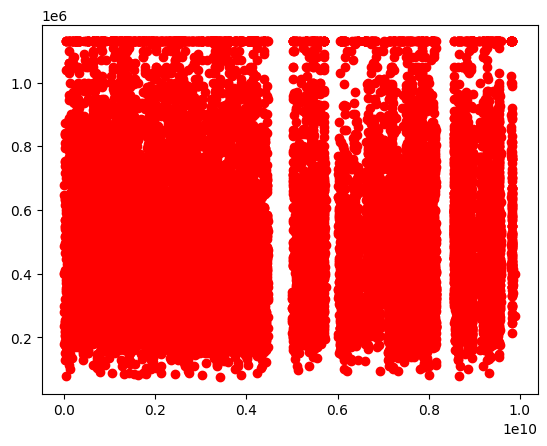

In [10]:
plt.scatter(x=df["ID"],y=df["Sale Price"],color="red")

<Axes: ylabel='Sale Price'>

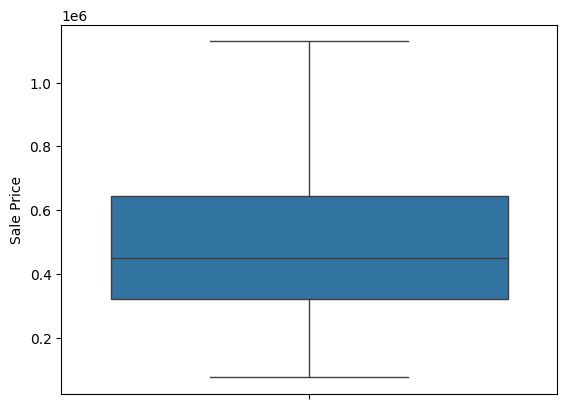

In [16]:
#plotting graphs 
sb.boxplot(df["Sale Price"])

In [ ]:
#Treating Outliers in TARGET Variables : should be less than lower limit and not more than upper limit 

In [4]:
q1=df["Sale Price"].quantile(0.25)
q3=df["Sale Price"].quantile(0.75)
iqr=q3-q1
u_limit=q3+1.5*iqr
l_limit=q1-1.5*iqr

In [5]:
def limit_imputer(val):
    if val>u_limit:
        return u_limit
    elif val<l_limit:
        return l_limit
    else:
        return val
df["Sale Price"]=df["Sale Price"].apply(limit_imputer)

In [6]:
df.dropna(inplace=True,axis=0,subset=["Sale Price"])

(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <BarContainer object of 10 artists>)

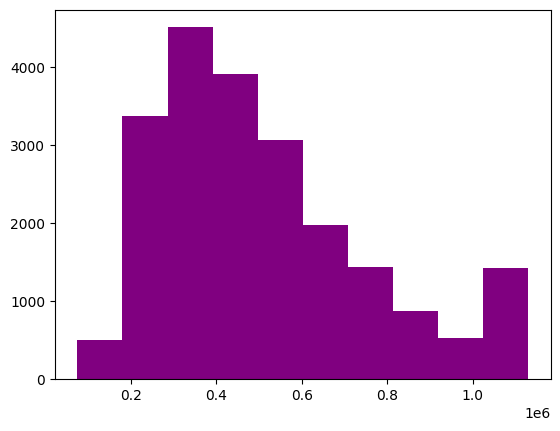

In [15]:
plt.hist(df["Sale Price"],bins=10,color="purple")

In [18]:
#Treating Independent(numerical) Variables

In [7]:
numerical_var=["No of Bathrooms","Flat Area (in Sqft)","Lot Area (in Sqft)","Area of the House from Basement (in Sqft)","Latitude","Longitude","Living Area after Renovation (in Sqft)"]

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
df[numerical_var]=imputer.fit_transform(df[numerical_var])

In [10]:
#Need to replace nan with none in no of times visited

In [11]:
df["No of Times Visited"].fillna("None",inplace=True)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_4828\2683315007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["No of Times Visited"].fillna("None",inplace=True)


In [18]:
# Treating independent variable (Zipcode)
#it takes only 2d array thus we are reshaping 1d -> 2d
col=df["Zipcode"].values.reshape(-1,1)
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Zipcode"]=imputer.fit_transform(col)

In [45]:
#We fixeed all NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

In [21]:
#Variable Transformation
df["Zipcode"]=df["Zipcode"].astype(object)

In [48]:
mapping={"None":0,"Once":1,"Twice":2,"Thrice":3,"Four":4}
df["No of Times Visited"]=df["No of Times Visited"].map(mapping)

In [28]:
df["Ever Renovated"]=np.where(df["Renovated Year"]==0,"No","Yes")

In [32]:
df["Purchased Year"]=pd.DatetimeIndex(df["Date House was Sold"]).year
df["Year Since Renovation"]=np.where(df["Ever Renovated"]=="Yes",abs(df["Purchased Year"]-df["Renovated Year"]),0)

In [41]:
df.drop(columns=["Date House was Sold","Purchased Year","Renovated Year"],inplace=True)

In [44]:
df.to_csv("Modified_Housing_Data",index=False)

In [3]:
df1=pd.read_csv("Modified_Housing_Data.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [7]:
df1.drop(columns="ID",inplace=True)

In [8]:
df1["Zipcode"]=df1["Zipcode"].astype(object)

In [9]:
# Categorical variables are Waterfront View, Condition of the House, Zipcode, Ever Renovated

In [34]:
df1["Condition of the House"].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

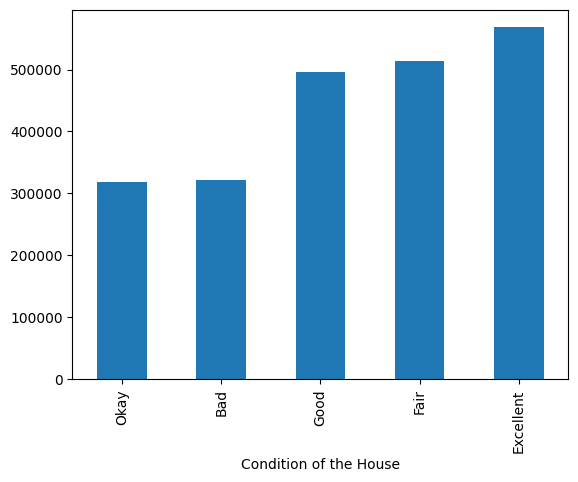

In [32]:
df1.groupby("Condition of the House")["Sale Price"].mean().sort_values().plot(kind="bar")

In [ ]:
#ANOVA : Used to check whether the categorical variables genuinely impacts the target variable or not 
# making sure the pr is less than -0.05 and f is larger value
#This will tell wether we can include them in the training set or not 

In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [5]:
df1=df1.rename(columns={"Sale Price":"Sale_Price","Condition of the House":"Condition_of_the_House","Ever Renovated":"Ever_Renovated","Waterfront View":"Waterfront_View"})

In [6]:
mod=ols("Sale_Price ~ Condition_of_the_House",data=df1).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [7]:
mod=ols("Sale_Price ~ Waterfront_View",data=df1).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [8]:
mod=ols("Sale_Price ~ Ever_Renovated",data=df1).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [10]:
mod=ols("Sale_Price ~ Zipcode",data=df1).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


In [ ]:
#converting categorical variables to dummy variables as regression requires varaiables to be numeric

In [12]:
df1=pd.get_dummies(df1,columns=["Condition_of_the_House","Ever_Renovated","Waterfront_View"],drop_first=True)

In [30]:
#Binning : used to reduce the number of levels in categorical variables as creating dummy for each level of category will be cumbersome process.
# e.g Zipcode has almost 71 levels thus require creation of 70 dummy variables. Through binning we are aggregating it to 10 groups

In [14]:
zip_table=df1.groupby("Zipcode").agg({"Sale_Price":"mean"}).sort_values("Sale_Price",ascending=True)
zip_table["Zipcode_groups"]=pd.cut(zip_table["Sale_Price"],bins=10,labels=["zip_g1","zip_g2","zip_g3","zip_g4","zip_g5","zip_g6","zip_g7","zip_g8","zip_g9","zip_g10"],include_lowest=True)
zip_table.drop(columns="Sale_Price",inplace=True)

In [24]:
df1=pd.merge(df1,zip_table,left_on="Zipcode",how="left",right_index=True)
df1.drop(columns="Zipcode",inplace=True)
#Creating dummies for zipcode
df1=pd.get_dummies(df1,columns=["Zipcode_groups"],drop_first=True)

In [28]:
df1.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_groups_zip_g2,Zipcode_groups_zip_g3,Zipcode_groups_zip_g4,Zipcode_groups_zip_g5,Zipcode_groups_zip_g6,Zipcode_groups_zip_g7,Zipcode_groups_zip_g8,Zipcode_groups_zip_g9,Zipcode_groups_zip_g10
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,False,False,False,False,False,False,False,False,False,False
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,False,False,True,False,False,False,False,False,False,False
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,False,False,True,False,False,False,False,False,False,False
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,False,False,False,True,False,False,False,False,False,False
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,False,False,False,False,True,False,False,False,False,False


In [29]:
df1.to_csv("Modified_Housing_Data2",index=False)

In [32]:
df2=pd.read_csv("Modified_Housing_Data2.csv")

In [44]:
df2.drop(columns="ID",inplace=True)

In [47]:
#Splitting Dataset : Train and Test
x,y=df2.iloc[:,1:31],df2.iloc[:,0]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [56]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [60]:
x_train[0,:5]

array([-0.40739379,  0.50000804, -0.46472585, -0.27375714,  0.93955683])